In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

plt.rc('figure', figsize=(20.0, 10.0))

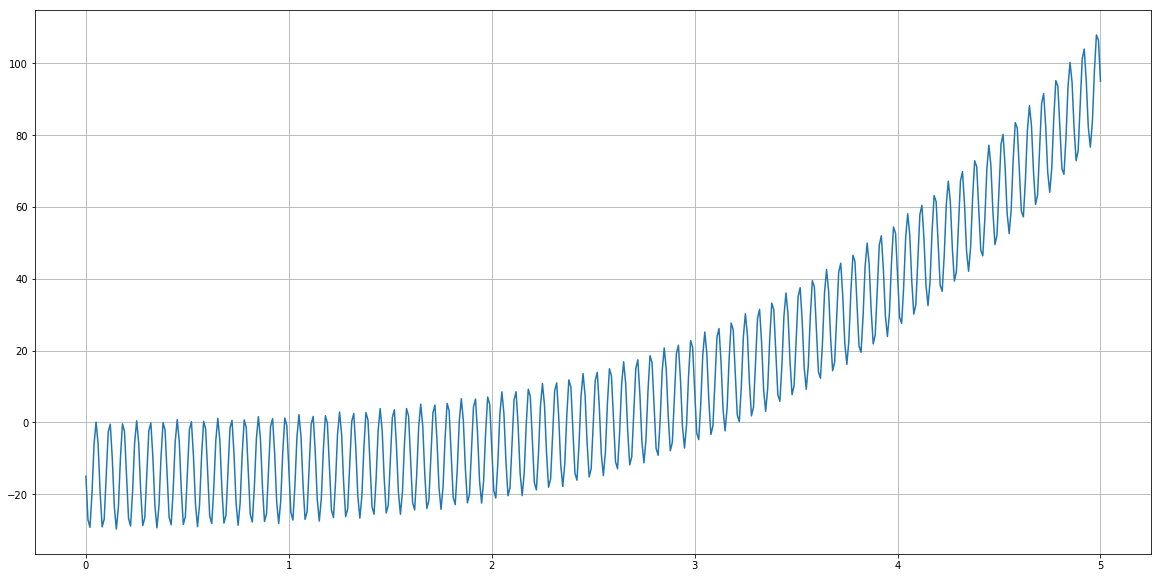

In [3]:
with open('f11.txt') as file:
    data = np.array([float(val) for val in file.read().split()])

T = 5.
dt = 0.01
time = np.arange(0, T + dt, dt)
plt.grid(True)
plt.plot(time, data);

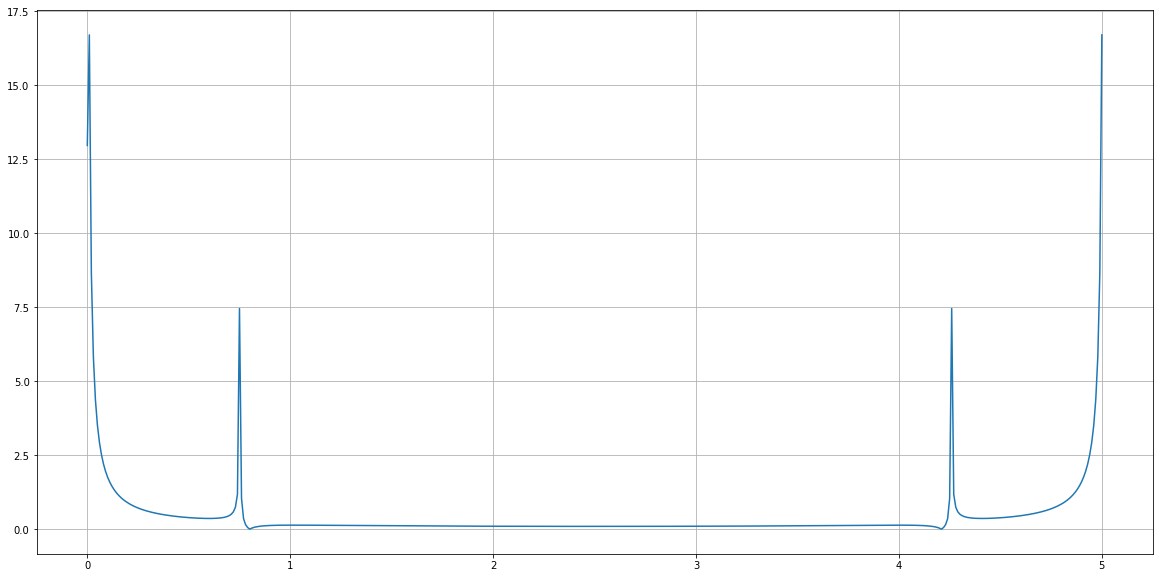

In [4]:
n = time.shape[0]
frequency = np.zeros((n))

for point_id in range(n):
    sin_freq = 0
    cos_freq = 0

    for signal in range(n):
        sin_freq += data[signal] * np.sin(2. * np.pi * point_id * signal / float(n))
        cos_freq += data[signal] * np.cos(2. * np.pi * point_id * signal / float(n))

    sin_freq /= float(n)
    cos_freq /= float(n)

    frequency[point_id] = np.sqrt(sin_freq ** 2 + cos_freq ** 2)

plt.grid(True)
plt.plot(time, frequency);

In [5]:
biggest_value = []

for i in range(3, n // 2):
    if np.max(frequency[i - 3:i + 3]) == frequency[i]:
        biggest_value.append(i)
        print(frequency[i])

main_frequency = biggest_value[0] / T

7.460089073083213
0.13635941025254036


In [6]:
b = np.array([np.sum(data * time ** 3), np.sum(data * time ** 2), np.sum(data * time),
              np.sum(data * np.sin(2. * np.pi * main_frequency * time)), np.sum(data)])

a = np.zeros((b.shape[0], b.shape[0]))

functions = [time ** 3, time ** 2, time, np.sin(2. * np.pi * main_frequency * time), np.ones(n)]

for i in range(b.shape[0]):
    for j in range(b.shape[0]):
        a[i, j] = np.sum(functions[i] * functions[j])

solution = np.linalg.inv(a) @ b.T

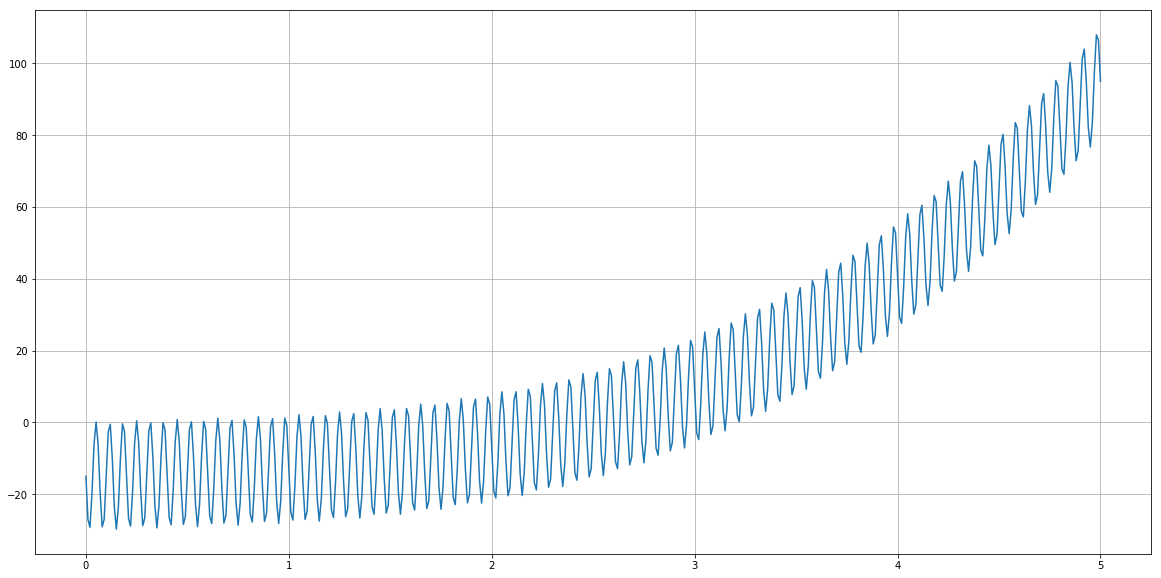

In [7]:
approximated_func = np.dot(solution, functions)
plt.grid(True)
plt.plot(time, approximated_func);

In [8]:
print("Mean squared error: ", mean_squared_error(data, approximated_func))

Mean squared error:  6.760852363614448e-10
